Nous détaillons ici le nettoyage des variables ainsi que l'analyse exploratoire des données des bâtiments non destinés à l'habitation de la ville de Seattle

In [83]:
#Import des librairies utiles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import re

In [84]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [85]:
pd.set_option("display.max_columns",100)

### 1. Choix du dataset

In [86]:
#Import des datasets
data_2015=pd.read_csv('2015-building-energy-benchmarking.csv')
data_2016=pd.read_csv('2016-building-energy-benchmarking.csv')

On trouve les détails des variables sur cette [page](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy) de l'open Data de la ville de Seattle.


In [87]:
#data_2015.info()
#data_2016.info()

In [88]:
#dimensions
print(data_2015.shape)
print(data_2016.shape)

(3340, 47)
(3376, 46)


In [89]:
#On enlève les duplicatas éventuels sur les ID des propriétés
data_2015=data_2015.drop_duplicates('OSEBuildingID')
data_2016=data_2016.drop_duplicates('OSEBuildingID')

In [90]:
#dimensions
print(data_2015.shape)
print(data_2016.shape)

(3340, 47)
(3376, 46)


On souhaite connaître le nombre de bâtiments commun entre les deux datasets.

In [91]:
# Liste des ID bâtiments respectifs
lst1=data_2015.OSEBuildingID.unique().tolist() 
lst2=data_2016.OSEBuildingID.unique().tolist() 

In [92]:
#Nombre de d'ID bâtiments en commun dans les deux datasets
a=len(set(lst1).intersection(lst2))
print(a)

3284


In [93]:
a/data_2015.shape[0]

0.9832335329341317

In [94]:
a/data_2016.shape[0]

0.9727488151658767

In [95]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [96]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Les deux datasets ont plus de 97 % de bâtiments en commun. Nous nous limitons au dataset de 2016 qui contient dans l'ensemble davantage de données, mais on imputera par le suite certaines données de 2015 notamment pour le nombre de bâtiments.

### 2. Nettoyage  des variables catégorielles

Observons les occurences uniques des variables catégorielles

In [97]:
data_2016.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [98]:
data_2016.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [99]:
data_2016.Neighborhood.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [100]:
data_2016.LargestPropertyUseType.unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indust

In [101]:
data_2016.SecondLargestPropertyUseType.unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Food Service', 'Worship Facility',


In [102]:
data_2016.ThirdLargestPropertyUseType.unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Food Service', 'Other - Services', 'Medical Office', 'Parking',
       'Other - Utility', 'Other - Lodging/Residential', 'K-12 School',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Pre-school/Daycare', 'Convenience Store without Gas Station',
       'Financial Office', 'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Fast Food Restaurant', 'Bar/Nightclub',
       'Manufacturing/Industrial Plant', 'Food Sales',
       'Supermarket/Grocery Store', 'Other/Specialty Hospital',
       'Worship Facility', 'Stri

In [103]:
data_2016.ComplianceStatus.unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [104]:
data_2016.Outlier.unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [105]:
data_2016.CouncilDistrictCode.unique()

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

In [106]:
#conversion en chaine de caractères.
data_2016['CouncilDistrictCode']=data_2016['CouncilDistrictCode'].apply(lambda x: str(x))

In [107]:
data_2016.ZipCode.unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98012.,
       98013., 98028., 98178., 98114., 98127., 98165., 98011., 98198.,
       98113., 98040., 98204., 98177., 98020., 98272., 98145.,    nan])

In [108]:
#conversion en chaine de caractères.
data_2016['ZipCode']=data_2016['ZipCode'].apply(lambda x: str(x))

On harmonise le mise en forme des variables catégorielles : mise en majuscule, enlèvement des espaces, gestion des slash.

In [109]:
#Remise en forme
for col in data_2016.columns:
    if data_2016[col].dtypes=='object' and col!='PropertyName':
        data_2016[col]=data_2016[col].apply(lambda x: x.upper().replace(' / ','/').replace(' ','_').replace('/','_').replace('-','_').replace('__','_').strip() if not pd.isna(x) else x)


### 3. Filtre sur les bâtiments non résidentiels

On crée un nouveau dataset df contenant les logements non résidentiels. 

Premier filtre sur la variable BuildingType

In [110]:
data_2016.BuildingType.unique()

array(['NONRESIDENTIAL', 'NONRESIDENTIAL_COS', 'MULTIFAMILY_MR_(5_9)',
       'SPS_DISTRICT_K_12', 'CAMPUS', 'MULTIFAMILY_LR_(1_4)',
       'MULTIFAMILY_HR_(10+)', 'NONRESIDENTIAL_WA'], dtype=object)

In [111]:
#Filtre sur la variable BuildingType
df=data_2016[data_2016['BuildingType'].isin(['NONRESIDENTIAL','NONRESIDENTIAL_COS','SPS_DISTRICT_K_12',\
                                             'CAMPUS','NONRESIDENTIAL_WA'])]

In [112]:
df.BuildingType.unique()

array(['NONRESIDENTIAL', 'NONRESIDENTIAL_COS', 'SPS_DISTRICT_K_12',
       'CAMPUS', 'NONRESIDENTIAL_WA'], dtype=object)

In [113]:
df.shape

(1668, 46)

Second filtre sur la varible PrimaryPropertyType.

In [114]:
df.PrimaryPropertyType.unique()

array(['HOTEL', 'OTHER', 'MIXED_USE_PROPERTY', 'K_12_SCHOOL',
       'UNIVERSITY', 'SMALL_AND_MID_SIZED_OFFICE',
       'SELF_STORAGE_FACILITY', 'WAREHOUSE', 'LARGE_OFFICE',
       'SENIOR_CARE_COMMUNITY', 'MEDICAL_OFFICE', 'RETAIL_STORE',
       'HOSPITAL', 'RESIDENCE_HALL', 'DISTRIBUTION_CENTER',
       'WORSHIP_FACILITY', 'SUPERMARKET_GROCERY_STORE', 'LABORATORY',
       'REFRIGERATED_WAREHOUSE', 'RESTAURANT', 'LOW_RISE_MULTIFAMILY',
       'OFFICE'], dtype=object)

In [115]:
#Filtre sur la variable PrimaryPropertyType
df=df[df['PrimaryPropertyType']!='RESIDENCE_HALL']
df=df[df['PrimaryPropertyType']!='LOW_RISE_MULTIFAMILY']

In [116]:
df[df['PrimaryPropertyType']=='SENIOR_CARE_COMMUNITY']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
59,84,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,PSSA - The Mount,4831_35TH_AVE_SW,SEATTLE,WA,98126.0,2324039001,1,SOUTHWEST,47.55837,-122.37751,1922,1.0,5,217603,0,217603,"PARKING,_SENIOR_CARE_COMMUNITY",SENIOR_CARE_COMMUNITY,296313.0,PARKING,0.0,NaN,NaN,NaN,54.0,144.399994,153.699997,235.000000,244.800003,42792072.00,45547252.00,0.0,3.465642e+06,11824772.0,309673.000000,30967300.0,False,NaN,COMPLIANT,NaN,1727.11,7.94
60,85,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,Foss Home and Village,13023_GREENWOOD_AVE._N,SEATTLE,WA,98133.0,2426039059,5,NORTHWEST,47.72426,-122.35599,1970,1.0,2,93397,0,93397,SENIOR_CARE_COMMUNITY,SENIOR_CARE_COMMUNITY,93397.0,NaN,NaN,NaN,NaN,NaN,1.0,175.600006,181.600006,311.500000,320.000000,16402563.00,16959754.00,0.0,1.664566e+06,5679498.0,107230.640600,10723064.0,False,NaN,COMPLIANT,NaN,609.10,6.52
171,278,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,ID Village Square 1,802_S._DEARBORN_ST.,SEATTLE,WA,98104.0,8592900105,2,DOWNTOWN,47.59626,-122.32180,1999,1.0,5,102796,12611,90185,"K_12_SCHOOL,_MEDICAL_OFFICE,_OFFICE,_RESTAURAN...",SENIOR_CARE_COMMUNITY,55259.0,MEDICAL_OFFICE,40091.0,K_12_SCHOOL,3231.0,NaN,NaN,98.300003,100.000000,254.300003,256.100006,10105379.00,10281401.00,0.0,2.177262e+06,7428816.0,26765.611330,2676561.0,False,NaN,COMPLIANT,NaN,193.94,1.89
888,20145,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,Cabrini Senior Housing,909_BOREN_AVENUE,SEATTLE,WA,98104.0,1285700000,3,EAST,47.60897,-122.32507,2006,1.0,6,62334,0,62334,"BANK_BRANCH,_PARKING,_SENIOR_CARE_COMMUNITY",SENIOR_CARE_COMMUNITY,35696.0,BANK_BRANCH,15661.0,PARKING,10877.0,NaN,100.0,21.000000,22.299999,41.599998,44.400002,1076733.25,1147752.25,0.0,1.410223e+05,481168.0,5955.649902,595565.0,False,NaN,COMPLIANT,NaN,34.98,0.56
966,20377,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,Washington Care Center,2821_S_WALDEN_ST,SEATTLE,WA,98144.0,1624049040,2,SOUTHEAST,47.57188,-122.29531,1981,1.0,3,78374,0,78374,"PARKING,_SENIOR_CARE_COMMUNITY",SENIOR_CARE_COMMUNITY,58665.0,PARKING,0.0,NaN,NaN,NaN,98.0,56.599998,57.900002,177.800003,181.899994,3321035.75,3397766.50,0.0,9.733398e+05,3321035.0,0.000000,0.0,False,NaN,COMPLIANT,NaN,23.15,0.30
1109,20885,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,Ballard Center,820_NW_95TH_STREET,SEATTLE,WA,98117.0,1865400030,6,BALLARD,47.69875,-122.36725,1966,1.0,2,34636,31000,3636,"PARKING,_SENIOR_CARE_COMMUNITY",SENIOR_CARE_COMMUNITY,36000.0,PARKING,0.0,NaN,NaN,NaN,3.0,337.500000,355.700012,561.099976,587.900024,12148720.00,12805711.00,0.0,1.043779e+06,3561375.0,85873.437500,8587344.0,False,NaN,COMPLIANT,NaN,480.90,13.88
1123,20970,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,Kin On Health Care Center,4416_S_BRANDON_ST,SEATTLE,WA,98118.0,1704900435,2,SOUTHEAST,47.55387,-122.27875,1966,1.0,2,48882,7233,41649,"PARKING,_SENIOR_CARE_COMMUNITY",SENIOR_CARE_COMMUNITY,41922.0,PARKING,9079.0,NaN,NaN,NaN,51.0,161.800003,168.100006,304.899994,311.600006,6782435.00,7048919.00,0.0,7.937441e+05,2708255.0,40741.800780,4074180.0,False,NaN,COMPLIANT,NaN,235.26,4.81
1208,21244,2016,NONRESIDENTIAL,SENIOR_CARE_COMMUNITY,Queen Anne Healthcare,2717_DEXTER_AVE_N,SEATTLE,WA,98109.0,1929300390,7,MAGNOLIA_QUEEN_ANNE,47.64410,-122.34795,1970,1.0,2,46539,0,4653

On décide de laisser les types "senior care community" car on les considère comme établissements de soins.

In [117]:
df.shape

(1644, 46)

In [118]:
#Filtre sur la variable LargestpropertyUseType
df = df[df['LargestPropertyUseType'].str.contains('housing',case=False)==False]

In [119]:
df.shape

(1629, 46)

In [120]:
df.reset_index(inplace=True,drop=True)

### 4. Nettoyage et premières analyses

#### Dispersion par types de logements.

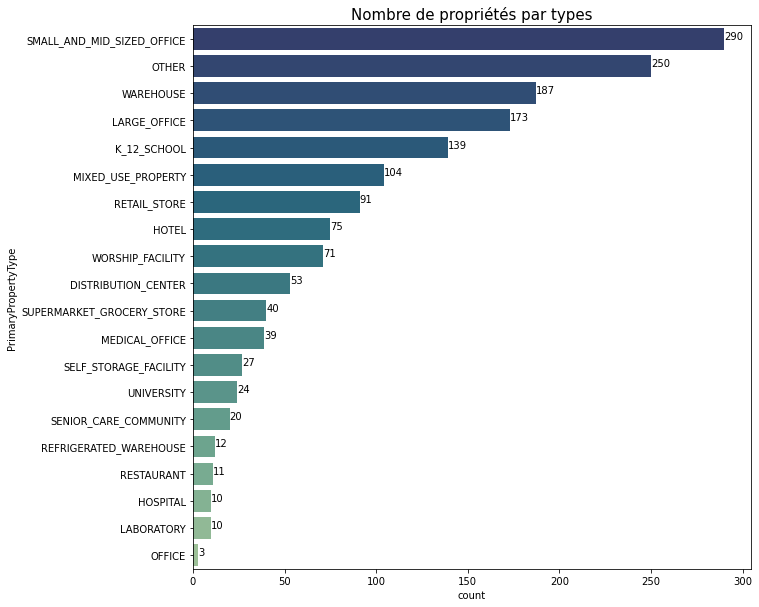

In [121]:
fig,ax=plt.subplots(figsize=(10,10))
chart=sns.countplot(data=df,y='PrimaryPropertyType',order=df['PrimaryPropertyType'].value_counts().index,palette='crest_r')
plt.title('Nombre de propriétés par types',size=15)
#Value number on chart
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, rect.get_width() )
plt.show()

#### Répartition par n° de District et voisinages

Text(0.5, 1.0, 'Répartition par numéro de district')

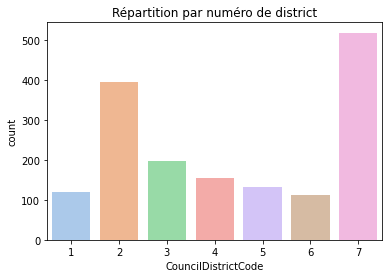

In [122]:
sns.countplot(data=df,x='CouncilDistrictCode',order=['1','2','3','4','5','6','7'],palette='pastel')
plt.title('Répartition par numéro de district')

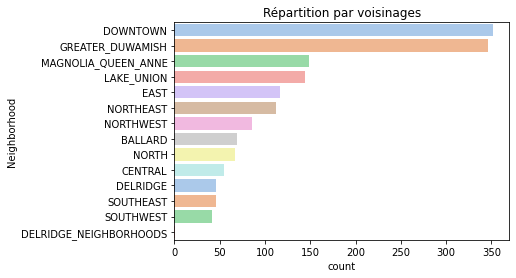

In [123]:
sns.countplot(data=df,y='Neighborhood',palette='pastel',order=df['Neighborhood'].value_counts().index)
plt.title('Répartition par voisinages')
plt.show()

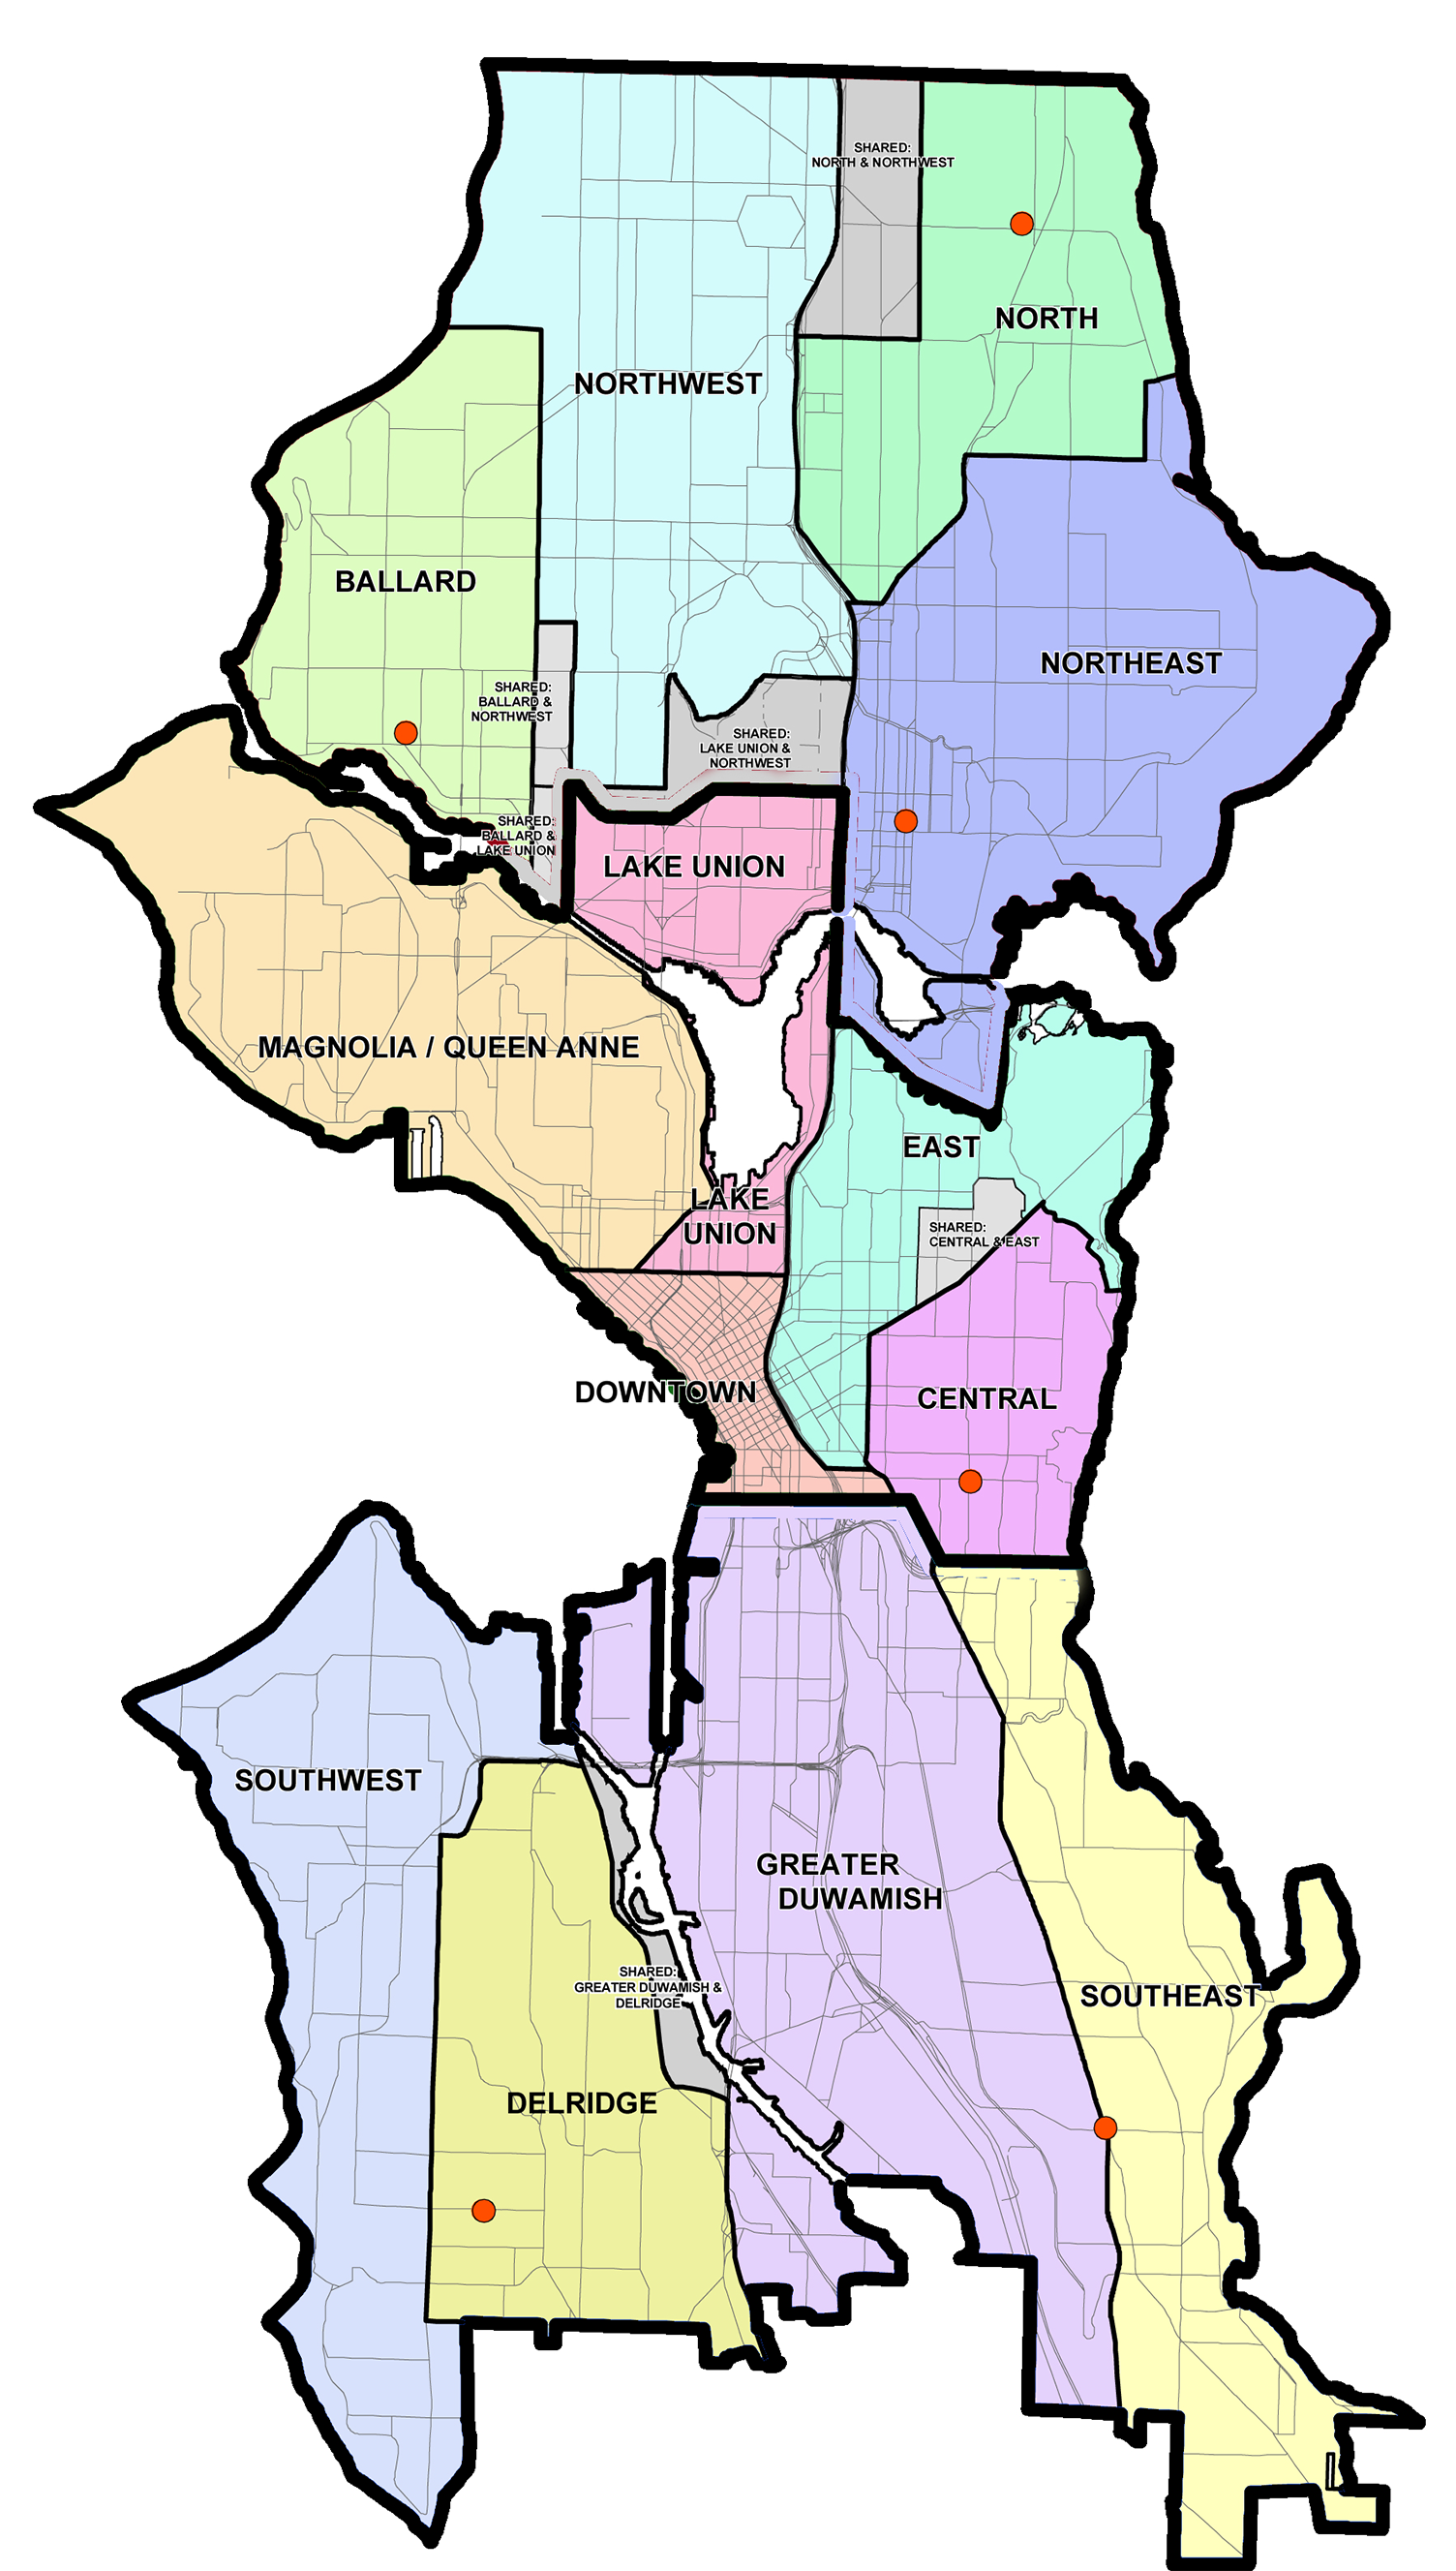

In [124]:
#carte de la ville de Seattle
from IPython.display import Image
Image(filename='seattle.png',width=600,height=600) 

#### Nombre d'étages

In [125]:
#Calcul des déciles
df['NumberofFloors'].describe(percentiles=np.arange(0,1,0.1))

count    1629.000000
mean        4.109269
std         6.572154
min         0.000000
0%          0.000000
10%         1.000000
20%         1.000000
30%         2.000000
40%         2.000000
50%         2.000000
60%         3.000000
70%         4.000000
80%         5.000000
90%         7.000000
max        99.000000
Name: NumberofFloors, dtype: float64

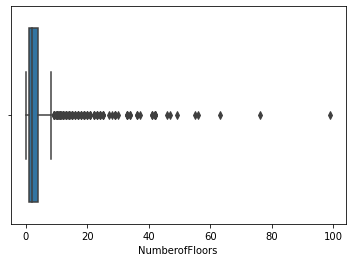

In [126]:
sns.boxplot(data=df,x='NumberofFloors')
plt.show()

La majorité des bâtiments a au maximum 7 étages.

In [127]:
#Liste des 5 bâtiments au plus grand nombre d'étages
df[['NumberofFloors','PrimaryPropertyType','PropertyName']].sort_values('NumberofFloors',ascending=False)[:5]

,NumberofFloors,PrimaryPropertyType,PropertyName
925,99,WORSHIP_FACILITY,Seattle Chinese Baptist Church
545,76,LARGE_OFFICE,Columbia Center - 2015
224,63,LARGE_OFFICE,Seattle Municipal Tower (2030)
283,56,LARGE_OFFICE,Two Union Square
262,55,LARGE_OFFICE,1201 Third Avenue


Après vérification, la Seattle Baptist Church n'a pas 99 étages mais plutôt 1. On corrige alors la valeur correspondante.

In [128]:
df.loc[925,'NumberofFloors']=1

#### Nombre de bâtiments

Détection de valeurs aberrantes

In [129]:
df['NumberofBuildings'].describe()

count    1629.000000
mean        1.170043
std         2.962698
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

In [130]:
df[df['NumberofBuildings']==0].shape

(51, 46)

In [131]:
data_2015['NumberofBuildings'].describe()

count    3340.000000
mean        1.035629
std         0.784463
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        39.000000
Name: NumberofBuildings, dtype: float64

51 propriétés ont 0 bâtiments. On ne retrouve pas ces valeurs incohérentes dans le dataset de 2015. On décide alors de remplacer les valeurs de 2016 par les valeurs de la variable de 2015 lorsque cela est possible. 

In [132]:
#on récupère les données utiles de 2015
dh=data_2015[['OSEBuildingID','NumberofBuildings']]

In [133]:
#Jointure sur l'ID de la propriété
data=pd.merge(df, dh, on=['OSEBuildingID'],how='left')

In [134]:
data.shape

(1629, 47)

In [135]:
#data['NumberofBuildings_x'].describe()

In [136]:
#data['NumberofBuildings_y'].describe()

In [137]:
#Imputation des valeurs de 2015 en conservant celles de 2016 si elles sont nulles
for i in range(data.shape[0]):
    if pd.isna(data['NumberofBuildings_y'][i]):
        data.loc[i,'NumberofBuildings']=data['NumberofBuildings_x'][i]
    else:
        data.loc[i,'NumberofBuildings']=data['NumberofBuildings_y'][i]

In [138]:
data=data.drop(['NumberofBuildings_x','NumberofBuildings_y'],axis=1)

In [139]:
df=data.copy()

Répartition du nombre de bâtiments

In [140]:
df['NumberofBuildings'].describe()

count    1629.000000
mean        1.130141
std         2.939021
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

La majorité des propriétés possèdent un seul bâtiment.

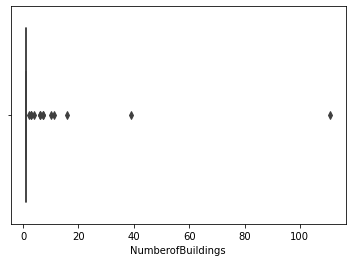

In [141]:
sns.boxplot(data=df, x='NumberofBuildings')

In [142]:
#Les 5 propriétés ayant le plus grand nombre de bâtiments

In [143]:
df[['NumberofBuildings','PrimaryPropertyType','PropertyName']].sort_values('NumberofBuildings',ascending=False)[:5]

,NumberofBuildings,PrimaryPropertyType,PropertyName
1592,111.0,UNIVERSITY,University of Washington - Seattle Campus
968,39.0,UNIVERSITY,Entire Campus
160,16.0,LARGE_OFFICE,South Park
126,11.0,UNIVERSITY,NSCC MAIN CAMPUS
1145,10.0,OTHER,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...


#### Année de construction

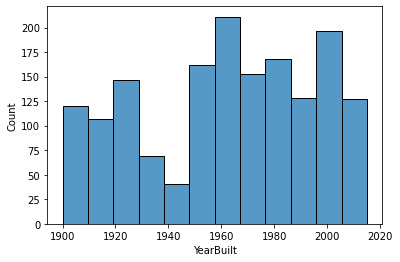

In [144]:
sns.histplot(data=df,x='YearBuilt')
plt.show()

La majorité des bâtiments ont été construits après les annés 1950.

On définit une variable âge.

In [145]:
df['Age']=2016-df['YearBuilt']

#### Superficie des bâtiments

In [146]:
df[ 'PropertyGFABuilding(s)'].describe()

count    1.629000e+03
mean     1.064567e+05
std      2.866395e+05
min      3.636000e+03
25%      2.850000e+04
50%      4.756000e+04
75%      9.450000e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

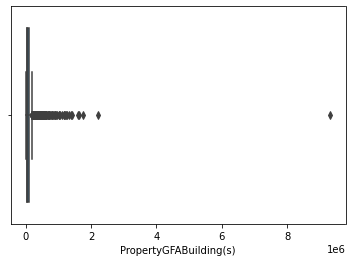

In [147]:
sns.boxplot(data=df,x= 'PropertyGFABuilding(s)')
plt.show()

In [148]:
# Liste des 5 bâtiments ordonnés selon la superficie du parking par ordre décroissant
df[['PropertyGFABuilding(s)','PrimaryPropertyType','PropertyName']].sort_values('PropertyGFABuilding(s)',ascending=False)[:5]

,PropertyGFABuilding(s),PrimaryPropertyType,PropertyName
1592,9320156,UNIVERSITY,University of Washington - Seattle Campus
968,2200000,UNIVERSITY,Entire Campus
603,1765970,HOSPITAL,Swedish First Hill
545,1632820,LARGE_OFFICE,Columbia Center - 2015
479,1592914,LARGE_OFFICE,Russell Investments Center


#### Superficie des parking

In [149]:
df[ 'PropertyGFAParking'].describe()

count      1629.000000
mean      13053.118478
std       42657.818840
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

In [150]:
df[['PropertyGFAParking','PrimaryPropertyType','PropertyName']].sort_values('PropertyGFAParking',ascending=False)[:5]

,PropertyGFAParking,PrimaryPropertyType,PropertyName
264,512608,LARGE_OFFICE,US Bank Centre
298,407795,MEDICAL_OFFICE,1101 Madison Tower
283,389860,LARGE_OFFICE,Two Union Square
220,368980,LARGE_OFFICE,Safeco Plaza
161,335109,OTHER,Building 1


La majorité des bâtiments ne possèdent pas de parking.

#### Consommation énergétique

Electricité

In [151]:
df['Electricity(kBtu)'].describe()

count    1.629000e+03
mean     5.913204e+06
std      2.101884e+07
min     -1.154170e+05
25%      7.209450e+05
50%      1.612547e+06
75%      4.897760e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

In [152]:
#Bâtiments qui consomment le moins d'électricité
df[['Electricity(kBtu)','PrimaryPropertyType','PropertyName']].sort_values('Electricity(kBtu)')[:5]

,Electricity(kBtu),PrimaryPropertyType,PropertyName
1570,-115417.0,SMALL_AND_MID_SIZED_OFFICE,Bullitt Center
927,0.0,K_12_SCHOOL,Olympic Hills Elementary
661,0.0,OTHER,Welcome Home Society - PriceCo
1094,0.0,K_12_SCHOOL,North Beach Elementary
295,0.0,OTHER,Washington State Convention Center


Le Bullit Center est un batiment qui héberge des bureaux. Il produit son électricité essentiellement à l'aide de panneaux solaires. https://www.youtube.com/watch?v=BNvXTqimMK4

In [153]:
#Bâtiments qui consomment le plus d'électricité
df[['Electricity(kBtu)','PrimaryPropertyType','PropertyName']].sort_values('Electricity(kBtu)',ascending=False)[:5]

,Electricity(kBtu),PrimaryPropertyType,PropertyName
1592,657074389.0,UNIVERSITY,University of Washington - Seattle Campus
544,274532495.0,OTHER,WestinBuilding
166,168683602.0,HOSPITAL,Harborview Medical Center
34,150476283.0,MIXED_USE_PROPERTY,Plant 2 Site
603,139354828.0,HOSPITAL,Swedish First Hill


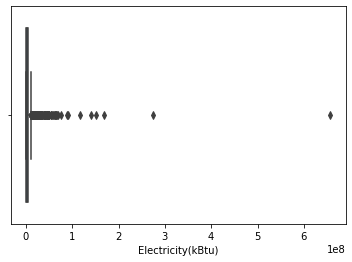

In [154]:
sns.boxplot(data=df,x='Electricity(kBtu)')
plt.show()

In [155]:
df[df['PropertyName']=='Bullitt Center']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,Age
1570,49784,2016,NONRESIDENTIAL,SMALL_AND_MID_SIZED_OFFICE,Bullitt Center,1501_E._MADISON_ST.,SEATTLE,WA,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,2013,6,52000,0,52000,OFFICE,OFFICE,48159.0,NaN,NaN,NaN,NaN,NaN,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,False,NaN,COMPLIANT,NaN,-0.8,-0.02,1.0,3


Commation de gaz

In [156]:
df['NaturalGas(kBtu)'].describe()

count    1.629000e+03
mean     1.990318e+06
std      9.473053e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.960960e+05
75%      1.522809e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64

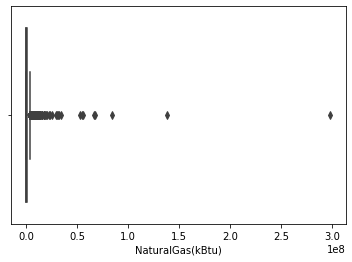

In [157]:
sns.boxplot(data=df,x='NaturalGas(kBtu)')
plt.show()

In [158]:
#Bâtiments ayant la plus grande consommation de gaz
df[['NaturalGas(kBtu)','PrimaryPropertyType','PropertyName']].sort_values('NaturalGas(kBtu)',ascending=False).head(5)

,NaturalGas(kBtu),PrimaryPropertyType,PropertyName
34,297909000.0,MIXED_USE_PROPERTY,Plant 2 Site
122,138191238.0,HOSPITAL,Seattle Children's Hospital Main Campus
163,84668094.0,HOSPITAL,Swedish Cherry Hill
1301,67990538.0,UNIVERSITY,5th Avenue Master Meter
331,66746425.0,OTHER,Weintraub/Hutchinson/Thomas


Géothermie

La plupart des bâtiments n'utilisent pas d'énergie géothermique.

In [159]:
df['SteamUse(kBtu)'].describe()

count    1.629000e+03
mean     5.211473e+05
std      5.575266e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64

In [160]:
df[['SteamUse(kBtu)','PrimaryPropertyType','PropertyName']].sort_values('SteamUse(kBtu)',ascending=False).head(10)

,SteamUse(kBtu),PrimaryPropertyType,PropertyName
603,134943456.0,HOSPITAL,Swedish First Hill
166,122575032.0,HOSPITAL,Harborview Medical Center
1592,84985240.0,UNIVERSITY,University of Washington - Seattle Campus
1587,73885472.0,HOSPITAL,Virginia Mason Medical Center - 2149
1550,31030194.0,LABORATORY,Reasearch and Training Building
253,28438884.0,HOTEL,Fairmont Olympic Seattle
2,21566554.0,HOTEL,5673-The Westin Seattle
1561,18547858.0,OTHER,VM Seattle Hospital & Medical Center - Jones P...
363,17548416.0,MIXED_USE_PROPERTY,Seattle Art Museum
263,16284570.0,HOTEL,WAC aggregate


Energie globale

In [161]:
df['SiteEnergyUse(kBtu)'].describe()

count    1.629000e+03
mean     8.538214e+06
std      3.056933e+07
min      0.000000e+00
25%      1.224186e+06
50%      2.553764e+06
75%      6.983736e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

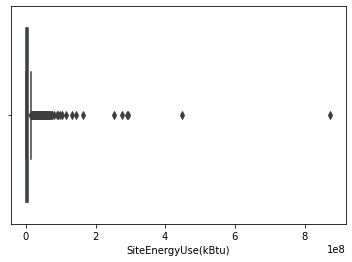

In [162]:
sns.boxplot(data=df,x='SiteEnergyUse(kBtu)')

In [163]:
#Bâtiments ayant la plus grande consommation d'énergie
df[['SiteEnergyUse(kBtu)','PrimaryPropertyType','PropertyName']].sort_values('SiteEnergyUse(kBtu)',ascending=False).head(5)

,SiteEnergyUse(kBtu),PrimaryPropertyType,PropertyName
1592,873923712.0,UNIVERSITY,University of Washington - Seattle Campus
34,448385312.0,MIXED_USE_PROPERTY,Plant 2 Site
166,293090784.0,HOSPITAL,Harborview Medical Center
603,291614432.0,HOSPITAL,Swedish First Hill
544,274682208.0,OTHER,WestinBuilding


In [164]:
#Bâtiments ayant la plus faible consommation d'énergie
df[['SiteEnergyUse(kBtu)','PrimaryPropertyType','PropertyName']].sort_values('SiteEnergyUse(kBtu)').head(5)

,SiteEnergyUse(kBtu),PrimaryPropertyType,PropertyName
84,0.0,K_12_SCHOOL,John Muir Elementary
30,0.0,K_12_SCHOOL,John Hay Elementary
131,0.0,K_12_SCHOOL,Whitman Middle
137,0.0,K_12_SCHOOL,Washington Middle
927,0.0,K_12_SCHOOL,Olympic Hills Elementary


#### Emissions de gaz à effet de serre

In [165]:
df['TotalGHGEmissions'].describe()

count     1629.000000
mean       187.155359
std        760.171399
min         -0.800000
25%         19.860000
50%         49.550000
75%        144.410000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

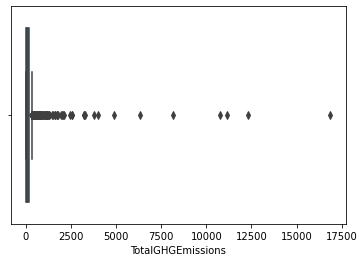

In [166]:
sns.boxplot(data=df,x='TotalGHGEmissions')
plt.show()

In [167]:
df[df['TotalGHGEmissions']<0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,Age
1570,49784,2016,NONRESIDENTIAL,SMALL_AND_MID_SIZED_OFFICE,Bullitt Center,1501_E._MADISON_ST.,SEATTLE,WA,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,2013,6,52000,0,52000,OFFICE,OFFICE,48159.0,NaN,NaN,NaN,NaN,NaN,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,False,NaN,COMPLIANT,NaN,-0.8,-0.02,1.0,3


In [168]:
#Liste des bâtiments émettant le moins de gaz à effet de serre
df[['TotalGHGEmissions','PrimaryPropertyType','PropertyName']].sort_values('TotalGHGEmissions')[:5]

,TotalGHGEmissions,PrimaryPropertyType,PropertyName
1570,-0.8,SMALL_AND_MID_SIZED_OFFICE,Bullitt Center
295,0.0,OTHER,Washington State Convention Center
661,0.0,OTHER,Welcome Home Society - PriceCo
927,0.0,K_12_SCHOOL,Olympic Hills Elementary
499,0.0,SUPERMARKET_GROCERY_STORE,IUC- Whole Foods Interbay


https://bullittcenter.org/building/building-features/tall-timbers/
Les structures en bois massif du bullit center retiennent le CO2

In [169]:
#Liste des bâtiments émettant le plus de gaz à effet de serre
df[['TotalGHGEmissions','PrimaryPropertyType','PropertyName','Address']].sort_values('TotalGHGEmissions',ascending=False).head(5)

,TotalGHGEmissions,PrimaryPropertyType,PropertyName,Address
34,16870.98,MIXED_USE_PROPERTY,Plant 2 Site,7755_E_MARGINAL_WAY_S
603,12307.16,HOSPITAL,Swedish First Hill,747_BROADWAY
1592,11140.56,UNIVERSITY,University of Washington - Seattle Campus,NE_45TH_ST_&_BROOKLYN_AVE
166,10734.57,HOSPITAL,Harborview Medical Center,325_9TH_AVE.
122,8145.52,HOSPITAL,Seattle Children's Hospital Main Campus,4800_SAND_POINT_WAY_NE


In [170]:
df[df['PropertyName']=='University of Washington - Seattle Campus']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,Age
1592,49967,2016,CAMPUS,UNIVERSITY,University of Washington - Seattle Campus,NE_45TH_ST_&_BROOKLYN_AVE,SEATTLE,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,0,9320156,0,9320156,COLLEGE_UNIVERSITY,COLLEGE_UNIVERSITY,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,COMPLIANT,NaN,11140.56,1.2,111.0,116


On constate que l'université de Wahsington représente une observation atypique en termes de superficies et par conséquent d'émissions de gaz à effet de serre et de consommation d'énergies.

In [171]:
df['SiteEUI(kBtu/sf)'].describe()

count    1628.000000
mean       72.537101
std        74.721599
min         0.000000
25%        33.700001
50%        51.799999
75%        81.749998
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64

In [172]:
df['GHGEmissionsIntensity'].describe()

count    1629.000000
mean        1.614236
std         2.357590
min        -0.020000
25%         0.340000
50%         0.870000
75%         1.890000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [173]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions

In [174]:
#suppressions de variables non utilisées par la suite

#données de localisation
df=df.drop(['City','State','Address','ZipCode','Latitude','Longitude','TaxParcelIdentificationNumber'],axis=1)

#variables doublons
df=df.drop(['Electricity(kWh)','NaturalGas(therms)'],axis=1)

#autres
df=df.drop(['DefaultData','Comments','ComplianceStatus','Outlier','ListOfAllPropertyUseTypes',\
            'YearsENERGYSTARCertified','OSEBuildingID','DataYear','BuildingType'],axis=1)

### 5.Filtres sur l'energy star score, traitement des NA et des outliers

L'un des buts de notre modèle est de voir si l'on peut se passer de l'energy star score. On se limite donc aux observations où celui-ci est renseigné.

In [175]:
#filtre sur les observations comprenant l'energy score
df=df.dropna(subset=['ENERGYSTARScore'])

Les bâtiments n'ayant pas de seconde ou troisième fonction ont une superficie correspondante égale à 0.

Traitement des valeurs manquantes

In [176]:
df['SecondLargestPropertyUseTypeGFA']=df['SecondLargestPropertyUseTypeGFA'].fillna(0)
df['SecondLargestPropertyUseType']=df['SecondLargestPropertyUseType'].fillna('NA')

In [177]:
df['ThirdLargestPropertyUseTypeGFA']=df['ThirdLargestPropertyUseTypeGFA'].fillna(0)
df['ThirdLargestPropertyUseType']=df['ThirdLargestPropertyUseType'].fillna('NA')

In [178]:
df.shape

(1069, 29)

In [179]:
#df.isna().sum()

In [180]:
df['SiteEUIWN(kBtu/sf)'].fillna(df['SiteEUIWN(kBtu/sf)'].median(), inplace=True)

In [181]:
df['SiteEnergyUseWN(kBtu)'].fillna(df['SiteEnergyUseWN(kBtu)'].median(), inplace=True)

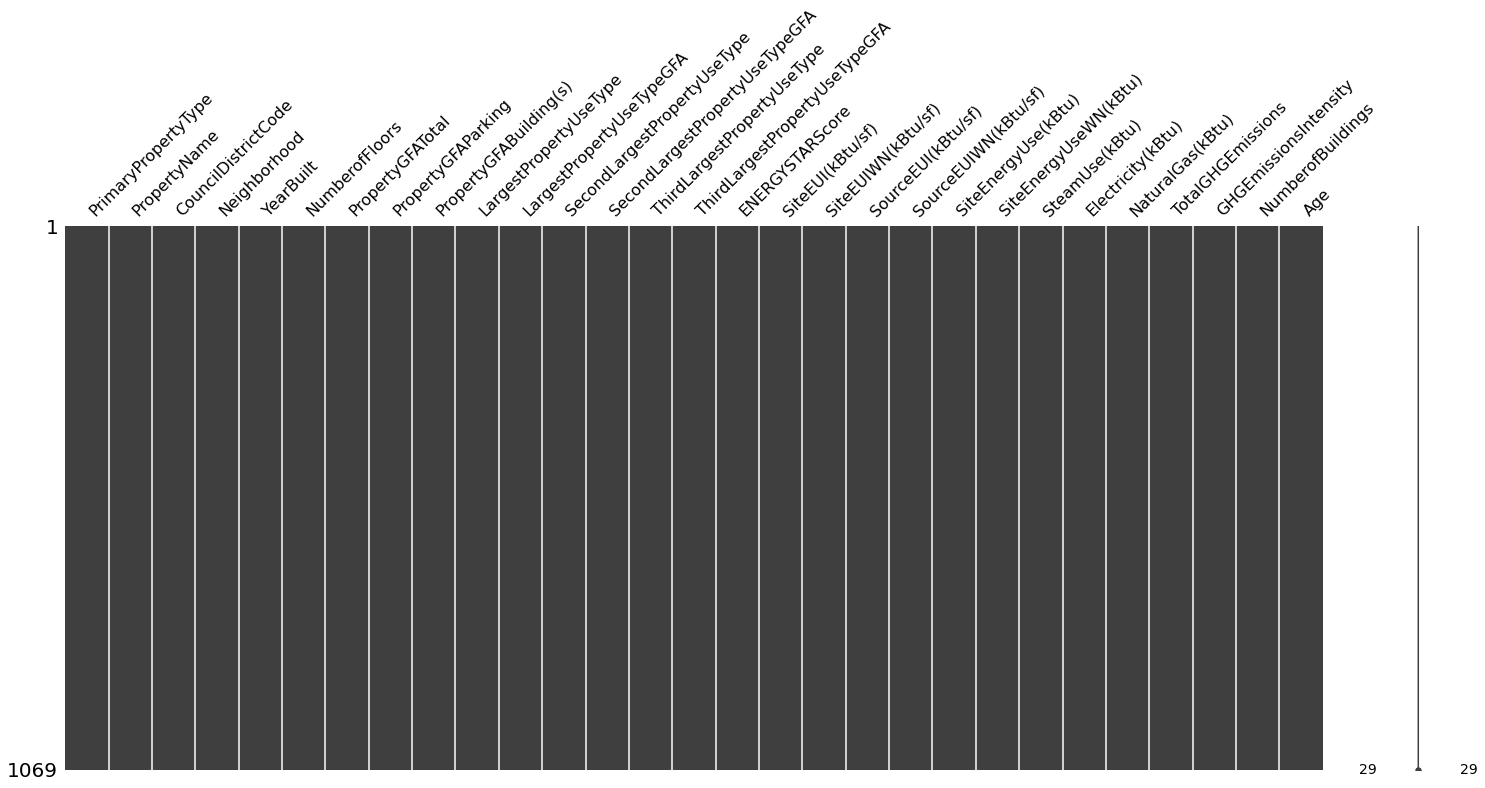

In [182]:
msno.matrix(df)
plt.show()

Afin de préparer au mieux notre modèle, on filtre que les z-scores inférieurs à 5.

In [183]:
df_temp=df.drop(['CouncilDistrictCode','YearBuilt','Age'],axis=1)

In [184]:
df_num=df_temp.select_dtypes(include='number')

df_z=df_num.copy()

for col in df_num.columns:
    if df_num[col].std()==0:
        df_z[col]=1
    else:
        df_z[col]=(df_num[col]-df_num[col].mean())/df_num[col].std()
    
df=df[abs(df_z<5).all(axis=1)]

In [185]:
df.shape

(1035, 29)

### 6. Analyses exploratoires

#### Analyses univariées

Après filtre sur les energy star score présents et les z-scores, nous allons voir que les valeurs prises par chaque variable sont moins dispersées. Les distributions restent dans l'ensemble les même mis à part pour les types de propriétés :  Le nombre de bâtiments de la catégorie "AUTRES" a très largement diminué. 

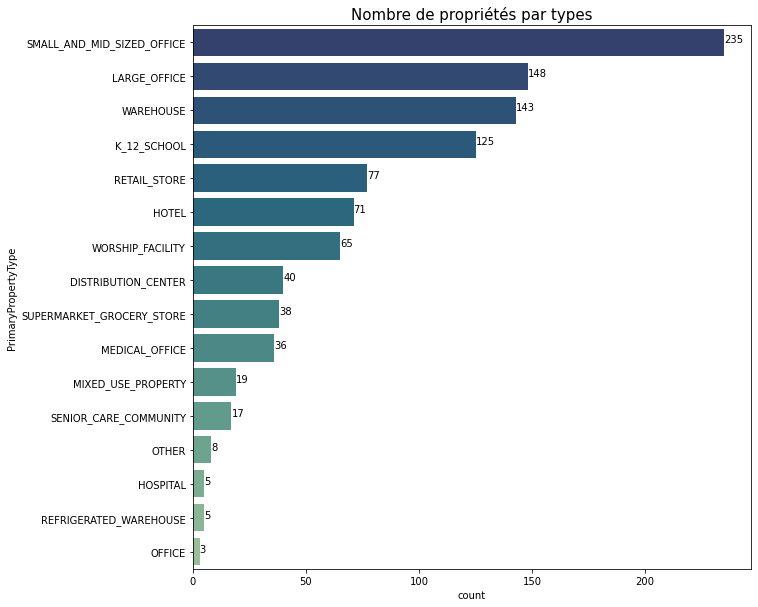

In [186]:
fig,ax=plt.subplots(figsize=(10,10))
chart=sns.countplot(data=df,y='PrimaryPropertyType',order=df['PrimaryPropertyType'].value_counts().index,palette='crest_r')
plt.title('Nombre de propriétés par types',size=15)
#Value number on chart
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, rect.get_width() )
plt.show()

 Les catégories les plus présentes sont les bureaux et entrepôts.

Text(0.5, 1.0, 'Répartition par numéro de district')

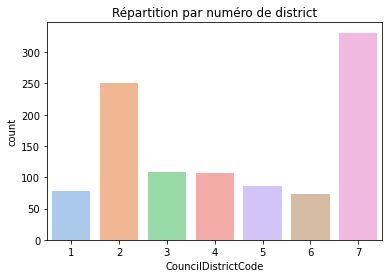

In [187]:
sns.countplot(data=df,x='CouncilDistrictCode',order=['1','2','3','4','5','6','7'],palette='pastel')
plt.title('Répartition par numéro de district')

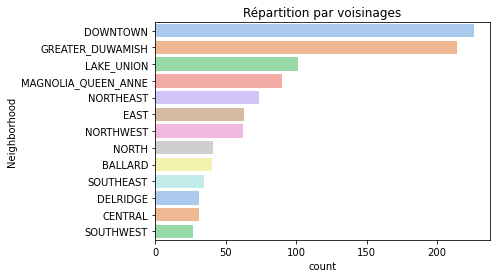

In [188]:
sns.countplot(data=df,y='Neighborhood',palette='pastel',order=df['Neighborhood'].value_counts().index)
plt.title('Répartition par voisinages')
plt.show()

La répartition par voisinages est conservée.

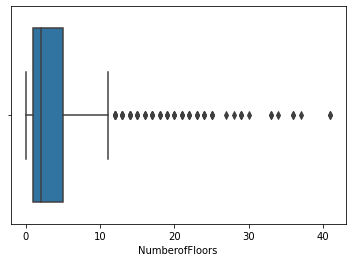

In [189]:
sns.boxplot(data=df,x='NumberofFloors')

In [190]:
df['NumberofBuildings'].describe()


count    1035.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: NumberofBuildings, dtype: float64

Le nombre de bâtiments est devenu constant. On l'enlève du dataset.

In [191]:
df=df.drop(['NumberofBuildings'],axis=1)

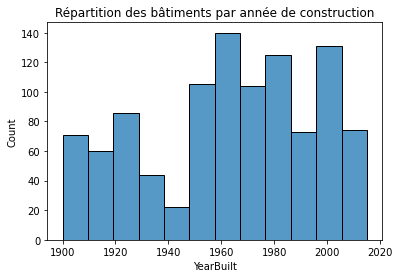

In [192]:
sns.histplot(data=df,x='YearBuilt')
plt.title('Répartition des bâtiments par année de construction')
plt.show()

On consere une distribution similaire pour l'année de construction.

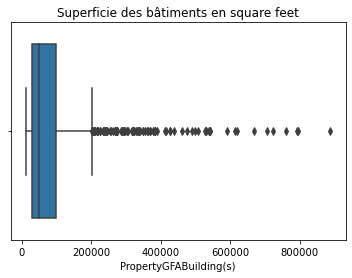

In [193]:
sns.boxplot(data=df,x= 'PropertyGFABuilding(s)')
plt.title('Superficie des bâtiments en square feet')
plt.show()

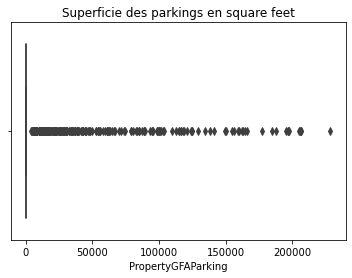

In [194]:
sns.boxplot(data=df,x= 'PropertyGFAParking')
plt.title('Superficie des parkings en square feet')
plt.show()

In [195]:
df[ 'PropertyGFAParking'].describe()

count      1035.000000
mean      12299.314010
std       34122.386039
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      228668.000000
Name: PropertyGFAParking, dtype: float64

In [196]:
df['Electricity(kBtu)'].describe()

count    1.035000e+03
mean     4.143518e+06
std      6.426581e+06
min     -1.154170e+05
25%      7.519655e+05
50%      1.634669e+06
75%      4.821154e+06
max      5.350652e+07
Name: Electricity(kBtu), dtype: float64

On a conservé le Bullitt Center dans nos données.

In [197]:
df['NaturalGas(kBtu)'].describe()

count    1.035000e+03
mean     1.359777e+06
std      3.550281e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.282180e+05
75%      1.277570e+06
max      5.609661e+07
Name: NaturalGas(kBtu), dtype: float64

In [198]:
df['SiteEnergyUse(kBtu)'].describe()

count    1.035000e+03
mean     5.760361e+06
std      8.985575e+06
min      0.000000e+00
25%      1.260078e+06
50%      2.545405e+06
75%      6.729752e+06
max      1.026737e+08
Name: SiteEnergyUse(kBtu), dtype: float64

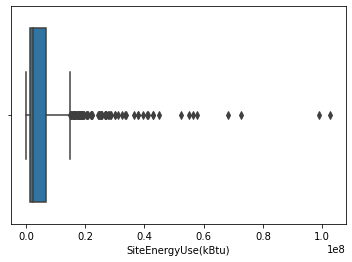

In [199]:
sns.boxplot(data=df,x='SiteEnergyUse(kBtu)')

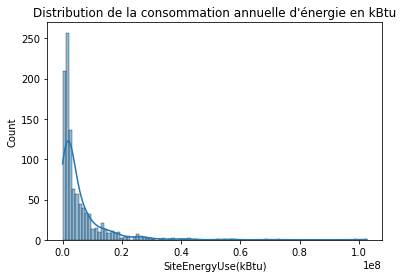

In [200]:
sns.histplot(data=df,x='SiteEnergyUse(kBtu)',kde=True)
plt.title('Distribution de la consommation annuelle d\'énergie en kBtu')
plt.show()

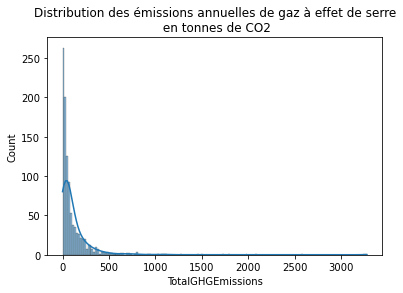

In [201]:
sns.histplot(data=df,x='TotalGHGEmissions',kde=True)
plt.title('Distribution des émissions annuelles de gaz à effet de serre\n en tonnes de CO2')
plt.show()

#### Analyses bi-variées. 

In [202]:
dh=df[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)']]

<Figure size 1440x1440 with 0 Axes>

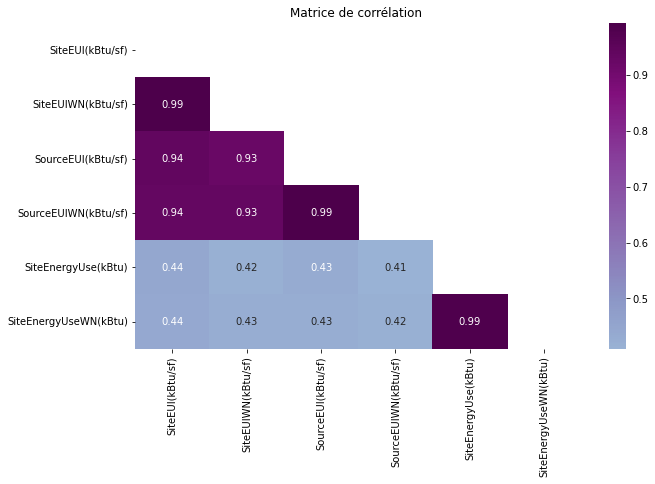

In [203]:
plt.figure(figsize=(20,20))
corr=dh.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,  h_pos=240,as_cmap=True)
plt.figure(figsize=(10,6))
sns.heatmap(dh.corr(),mask=mask,center=0.5,cmap="BuPu",annot=True,fmt='.2f')
plt.title('Matrice de corrélation ')
plt.show()

SourceEUI(kBtu/sf) est l'énergie annuelle consommée par le bâtiment+ l'énergie totale utilisée depuis la source pour la produire etla distribuer, par square foot

SiteEUI(kBtu/sf) est l'énergie annuelle consommée par le bâtiment par square foot

Sans surprise, ces variables sont fortement corrélées, aisni qu'avec la consommation d'énergie sur 30 ans dans des conditions météorologiques moyennes par square foot/

In [204]:
df.columns

Index(['PrimaryPropertyType', 'PropertyName', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Age'],
      dtype='object')

In [205]:
dh2=df.drop(['YearBuilt','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','SiteEUIWN(kBtu/sf)',\
            'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)','PropertyGFATotal'\
           ],axis=1)

<Figure size 1440x1440 with 0 Axes>

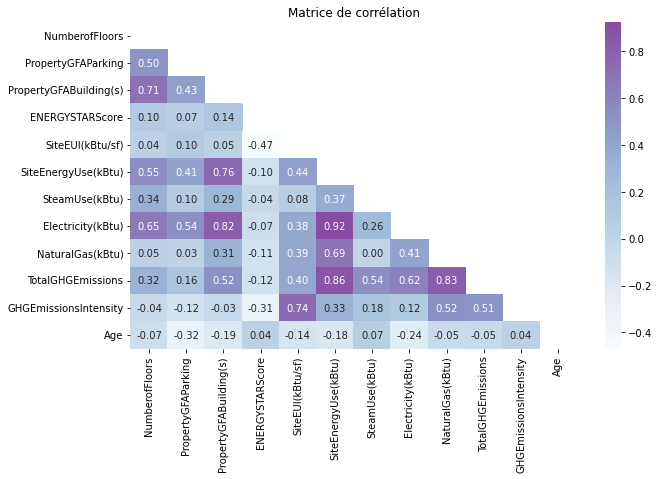

In [206]:
plt.figure(figsize=(20,20))
corr=dh2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,  h_pos=240,as_cmap=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,mask=mask,center=0.5,cmap="BuPu",annot=True,fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

Au sens de corrélations linéaires,
La consommation d'énergie est le plus corrélée à la superficie des bâtiments, ainsi qu'à la consommation des différentes sources d'énergie.  
-On a une forte corrélation positive entre les émisssions totales de gaz à effet de serre et la consommation d'énergie, de gaz particulièrement.    
-Pas de corrélation particulièrement forte relevée pour l'énergystarscore, mais celle-ci est le plus corrélée à la consommation énergétique du site par square foot.

Regardons maintenant la consommation d'énergie et les émissions de CO2 par types de propriétés.

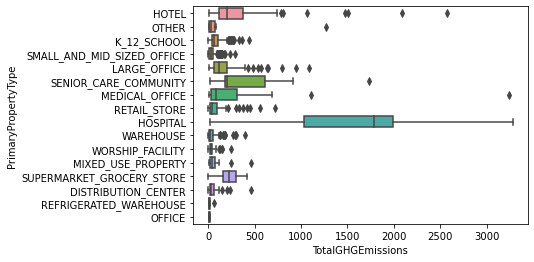

In [207]:
sns.boxplot(data=df,x='TotalGHGEmissions',y='PrimaryPropertyType')
plt.show()

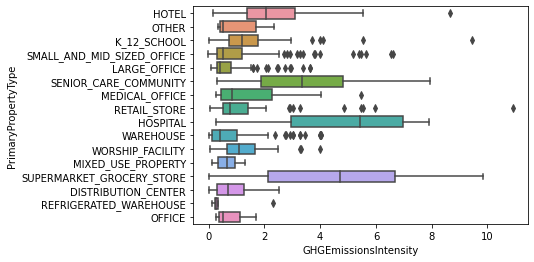

In [208]:
sns.boxplot(data=df,x='GHGEmissionsIntensity',y='PrimaryPropertyType')
plt.show()

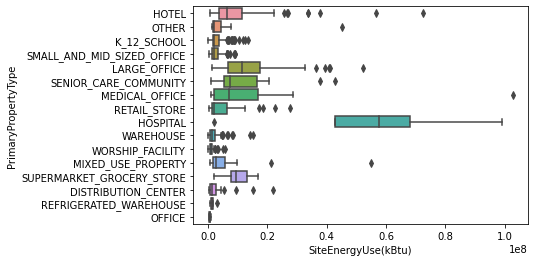

In [209]:
sns.boxplot(data=df,x='SiteEnergyUse(kBtu)',y='PrimaryPropertyType')

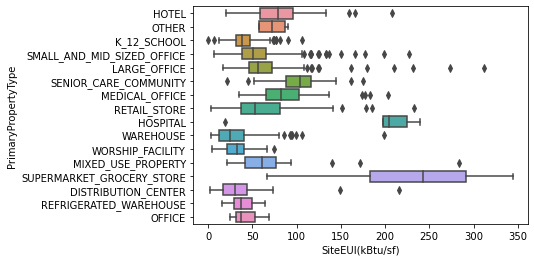

In [210]:
sns.boxplot(data=df,x='SiteEUI(kBtu/sf)',y='PrimaryPropertyType')
plt.show()

Les hopitaux sont les bâtiments qui consomment le plus d'énergie et emettent le plus de CO2 au global. Cependant, en prenant le ratio par square feet, ils sont devancés par les supermarchés. 

Nous simplifions la variable PrimaryPropertyType en faisant des groupes dans le but de rendre notre modélisation plus efficace.

In [211]:
def groupType(x):
    if x in ['K_12_SCHOOL','DISTRIBUTION_CENTER','WORSHIP_FACILITY','OFFICE','SMALL_AND_MID_SIZED_OFFICE','WAREHOUSE',\
            'MIXED_USE_PROPERTY','REFRIGERATED_WAREHOUSE']:
        return 'low_energyuse_co2emi'
    else:
        return x

In [212]:
df['PrimaryPropertyType2']=df['PrimaryPropertyType'].apply(groupType)

### 7. Crétaion de nouvelles variables


#### Ratios des différentes sources d'énergies utilisées

In [213]:
df['propSteamUse']=df['SteamUse(kBtu)']/(df['SteamUse(kBtu)']+df['NaturalGas(kBtu)']+df['Electricity(kBtu)'])

In [214]:
df['propNaturalGas']=df['NaturalGas(kBtu)']/(df['SteamUse(kBtu)']+df['NaturalGas(kBtu)']+df['Electricity(kBtu)'])

In [215]:
df['propElectricity']=df['Electricity(kBtu)']/(df['SteamUse(kBtu)']+df['NaturalGas(kBtu)']+df['Electricity(kBtu)'])

In [216]:
df[df['propElectricity'].isnull()]

,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PrimaryPropertyType2,propSteamUse,propNaturalGas,propElectricity
499,SUPERMARKET_GROCERY_STORE,IUC- Whole Foods Interbay,7,MAGNOLIA_QUEEN_ANNE,2008,1,57176,0,57176,SUPERMARKET_GROCERY_STORE,39500.0,RETAIL_STORE,15000.0,"PERSONAL_SERVICES_(HEALTH_BEAUTY,_DRY_CLEANING...",5500.0,31.0,208.800003,214.100006,0.0,0.0,12525174.0,12843856.0,0.0,0.0,0.0,0.0,0.0,8,SUPERMARKET_GROCERY_STORE,NaN,NaN,NaN
927,K_12_SCHOOL,Olympic Hills Elementary,5,NORTH,1954,1,42292,0,42292,K_12_SCHOOL,43188.0,NA,0.0,NA,0.0,100.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,low_energyuse_co2emi,NaN,NaN,NaN


In [217]:
#On complète les valeurs manquantes par 0 

In [218]:
df['propElectricity']=df['propElectricity'].fillna(0)

In [219]:
df['propNaturalGas']=df['propNaturalGas'].fillna(0)

In [220]:
df['propSteamUse']=df['propSteamUse'].fillna(0)

#### Ratios des superficies entre les différentes fonctions du logement.

On cherche les ratios des superficies entre les différentes fonctions du bâtiment. Par exemple, un bâtiment poura servir à 80 % de sa superficie de grands bureaux (1ere fonction), 15% de parking (2e fonction) et 5% d'une troisième fonction "autre".  
Nous allons définir une variable par type de propriété. Elles seront constituées des proportions correspondantes pour chaque bâtiment.  
Dans l'exemple ci-dessus, "LARGE_OFFICE" prendra alors la valeur 0.8 , "PARKING" la valeur 0.15 et 'OTHER' la valeur 0.05.

On regroupe les occurences des 1eres, 2nde et 3e fonctions du bâtiment selon les groupes définis dans la fonction groupType.

In [221]:
df['LargestPropertyUseType']=df['LargestPropertyUseType'].apply(groupType)

In [222]:
df['SecondLargestPropertyUseType']=df['SecondLargestPropertyUseType'].apply(groupType)

In [223]:
df['ThirdLargestPropertyUseType']=df['ThirdLargestPropertyUseType'].apply(groupType)

On simplifie encore les occurences de LargestPropertyUseType, SecondLargestPropertyUseType, 'ThirdLargestPropertyUseType'

In [224]:
df['LargestPropertyUseType'].unique()

array(['HOTEL', 'COURTHOUSE', 'low_energyuse_co2emi',
       'SENIOR_CARE_COMMUNITY', 'MEDICAL_OFFICE', 'RETAIL_STORE',
       'HOSPITAL_(GENERAL_MEDICAL_&_SURGICAL)', 'FINANCIAL_OFFICE',
       'NON_REFRIGERATED_WAREHOUSE', 'PARKING',
       'SUPERMARKET_GROCERY_STORE', 'WHOLESALE_CLUB_SUPERCENTER', 'OTHER',
       'BANK_BRANCH'], dtype=object)

In [225]:
df['SecondLargestPropertyUseType'].unique()

array(['NA', 'PARKING', 'NON_REFRIGERATED_WAREHOUSE', 'OTHER__EDUCATION',
       'RETAIL_STORE', 'OTHER__ENTERTAINMENT_PUBLIC_ASSEMBLY',
       'RESTAURANT', 'SWIMMING_POOL', 'SELF_STORAGE_FACILITY',
       'low_energyuse_co2emi', 'OTHER__SERVICES', 'LABORATORY',
       'OTHER__RECREATION', 'CONVENIENCE_STORE_WITHOUT_GAS_STATION',
       'OTHER', 'PERFORMING_ARTS', 'COLLEGE_UNIVERSITY',
       'SUPERMARKET_GROCERY_STORE', 'ADULT_EDUCATION', 'DATA_CENTER',
       'MULTIFAMILY_HOUSING', 'BAR_NIGHTCLUB', 'FINANCIAL_OFFICE',
       'MANUFACTURING_INDUSTRIAL_PLANT', 'BANK_BRANCH', 'HOTEL',
       'MEDICAL_OFFICE', 'PRE_SCHOOL_DAYCARE', 'OTHER__RESTAURANT_BAR'],
      dtype=object)

In [226]:
df['ThirdLargestPropertyUseType'].unique()

array(['NA', 'RESTAURANT', 'SWIMMING_POOL', 'DATA_CENTER', 'RETAIL_STORE',
       'OTHER', 'OTHER__SERVICES', 'MEDICAL_OFFICE', 'FOOD_SERVICE',
       'PARKING', 'FITNESS_CENTER_HEALTH_CLUB_GYM', 'SOCIAL_MEETING_HALL',
       'PRE_SCHOOL_DAYCARE', 'CONVENIENCE_STORE_WITHOUT_GAS_STATION',
       'FINANCIAL_OFFICE', 'NON_REFRIGERATED_WAREHOUSE',
       'OTHER__RESTAURANT_BAR', 'OTHER__EDUCATION',
       'low_energyuse_co2emi', 'LABORATORY', 'BANK_BRANCH',
       'OTHER__ENTERTAINMENT_PUBLIC_ASSEMBLY', 'MULTIFAMILY_HOUSING',
       'PERSONAL_SERVICES_(HEALTH_BEAUTY,_DRY_CLEANING,_ETC)',
       'OTHER__RECREATION', 'OTHER__TECHNOLOGY_SCIENCE', 'BAR_NIGHTCLUB',
       'OTHER_SPECIALTY_HOSPITAL'], dtype=object)

On dédinit dans la liste L nos nouvelles variables.

In [227]:
L=df['PrimaryPropertyType2'].unique().tolist()
L

['HOTEL',
 'OTHER',
 'low_energyuse_co2emi',
 'LARGE_OFFICE',
 'SENIOR_CARE_COMMUNITY',
 'MEDICAL_OFFICE',
 'RETAIL_STORE',
 'HOSPITAL',
 'SUPERMARKET_GROCERY_STORE']

In [228]:
L.append('PARKING')
L.append('RESTAURANT')
L.append('UNIVERSITY')
L.append('LABORATORY')

In [229]:
L

['HOTEL',
 'OTHER',
 'low_energyuse_co2emi',
 'LARGE_OFFICE',
 'SENIOR_CARE_COMMUNITY',
 'MEDICAL_OFFICE',
 'RETAIL_STORE',
 'HOSPITAL',
 'SUPERMARKET_GROCERY_STORE',
 'PARKING',
 'RESTAURANT',
 'UNIVERSITY',
 'LABORATORY']

In [230]:
#La fonction transform group permet de regrouper les valeurs de second et third propertyusetype dans les catégories souhaitées.
def transformGroup(x):
    if x=='NON_REFRIGERATED_WAREHOUSE':
        return 'low_energyuse_co2emi'
    elif (re.search('food',x,re.IGNORECASE)):
        return 'RESTAURANT'
    elif re.search('(school|education)',x,re.IGNORECASE) :
        return 'low_energyuse_co2emi'
    elif re.search('university',x,re.IGNORECASE):
        return 'University'.upper()
    elif re.search('hospital',x,re.IGNORECASE):
        return 'HOSPITAL'
    elif x in L:
        return x
    else:
        return 'OTHER'

In [231]:
df['SecondLargestPropertyUseType']=df['SecondLargestPropertyUseType'].apply(transformGroup)

In [232]:
df['ThirdLargestPropertyUseType']=df['ThirdLargestPropertyUseType'].apply(transformGroup)

On crée nos nouvelles colonnes que l'on initialise à 0.

In [233]:
for col in L:
    df[col]=float(0)


In [234]:
df['NA']=0

In [235]:
df.reset_index(drop=True,inplace=True)

In [236]:
df['PropertyGFATotal']=df['PropertyGFATotal'].apply(lambda x: float(x))

In [237]:
#Création des proportions de superficies correspondantes par types de propriétés pour chaque bâtiment
for i in range(df.shape[0]):
    a=df['PrimaryPropertyType2'][i]
    b=df['SecondLargestPropertyUseType'][i]
    c=df['ThirdLargestPropertyUseType'][i]
    #print(a)
    df.loc[i,a]+=df['LargestPropertyUseTypeGFA'][i]/df['PropertyGFATotal'][i]
    #print(df.loc[i,a])
    df.loc[i,b]+=df['SecondLargestPropertyUseTypeGFA'][i]/df['PropertyGFATotal'][i]
    df.loc[i,c]+=df['ThirdLargestPropertyUseTypeGFA'][i]/df['PropertyGFATotal'][i]

In [238]:
#On enlève les proportions soont supérieures à 1 (possible si une ou la somme des superficies des 3 fonctions est supérieure à la superficie totale)
for col in L:
    df[col]=df[col].apply(lambda x: 1 if x>1 else x)

In [239]:
df.head(10)

,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PrimaryPropertyType2,propSteamUse,propNaturalGas,propElectricity,HOTEL,OTHER,low_energyuse_co2emi,LARGE_OFFICE,SENIOR_CARE_COMMUNITY,MEDICAL_OFFICE,RETAIL_STORE,HOSPITAL,SUPERMARKET_GROCERY_STORE,PARKING,RESTAURANT,UNIVERSITY,LABORATORY,NA
0,HOTEL,Mayflower park hotel,7,DOWNTOWN,1927,12,88434.0,0,88434,HOTEL,88434.0,OTHER,0.0,OTHER,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83,89,HOTEL,0.277302,0.176638,0.546060,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
1,HOTEL,Paramount Hotel,7,DOWNTOWN,1996,11,103566.0,15064,88502,HOTEL,83880.0,PARKING,15064.0,RESTAURANT,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86,20,HOTEL,0.000000,0.613391,0.386609,0.809918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145453,0.044629,0.0,0.0,0
2,HOTEL,5673-The Westin Seattle,7,DOWNTOWN,1969,41,956110.0,196718,759392,HOTEL,756493.0,OTHER,0.0,OTHER,0.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,47,HOTEL,0.297113,0.020579,0.682307,0.791220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
3,HOTEL,HOTEL MAX,7,DOWNTOWN,1926,10,61320.0,0,61320,HOTEL,61320.0,OTHER,0.0,OTHER,0.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67,90,HOTEL,0.325913,0.266567,0.407519,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
4,HOTEL,WARWICK SEATTLE HOTEL (ID8),7,DOWNTOWN,1980,18,175580.0,62000,113580,HOTEL,123445.0,PARKING,68009.0,OTHER,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88,36,HOTEL,0.000000,0.621198,0.378802,0.703070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387339,0.000000,0.0,0.0,0
5,HOTEL,Camlin,7,DOWNTOWN,1926,11,83008.0,0,83008,HOTEL,81352.0,OTHER,0.0,OTHER,0.0,27.0,70.800003,74.500000,146.600006,154.699997,5758795.0,6062767.5,0.00,2811215.0,2947580.0,176.14,2.12,90,HOTEL,0.000000,0.511840,0.488160,0.980050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
6,HOTEL,311wh-Pioneer Square,7,DOWNTOWN,1904,15,163984.0,0,163984,HOTEL,163984.0,OTHER,0.0,OTHER,0.0,43.0,83.699997,86.599998,180.899994,187.199997,13723820.0,14194054.0,0.00,7297919.0,6425900.0,392.16,2.39,112,HOTEL,0.000000,0.468230,0.531770,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
7,HOTEL,Hotel Monaco Seattle,7,DOWNTOWN,1969,11,153163.0,19279,133884,HOTEL,133884.0,OTHER,0.0,OTHER,0.0,30.0,119.599999,124.300003,228.199997,233.000000,16016644.0,16646930.0,5237165.50,6187627.0,4591850.0,691.26,4.51,47,HOTEL,0.326983,0.286692,0.386325,0.874128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
8,HOTEL,5679-W Seattle,7,DOWNTOWN,1998,25,333176.0,61161,272015,HOTEL,336640.0,OTHER,0.0,OTHER,0.0,36.0,80.000000,80.400002,199.000000,199.399994,26941110.0,27070114.0,5999360.50,18083049.0,2858700.0,740.97,2.22,18,HOTEL,0.222684,0.106109,0.671207,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
9,HOTEL,Executive Pacific Plaza,7,DOWNTOWN,1928,9,65009.0,0,65009,HOTEL,65009.0,OTHER,0.0,OTHER,0.0,48.0,101.500000,97.800003,153.600006,149.800003,6596057.5,6358719.5,1656352.50,1343000.0,3596705.0,328.23,5.05,88,HOTEL,0.251113,0.545281,0.203606,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0


Finalement, on sélectionne les variables que l'on pense utiles pour la modélisation.

In [240]:
df=df[['PrimaryPropertyType','PropertyName','CouncilDistrictCode','Neighborhood','NumberofFloors','PropertyGFABuilding(s)','PropertyGFAParking','ENERGYSTARScore','SiteEnergyUse(kBtu)',\
      'TotalGHGEmissions','Age','propSteamUse','propNaturalGas','propElectricity','HOTEL','OTHER','low_energyuse_co2emi','LARGE_OFFICE',\
      'SENIOR_CARE_COMMUNITY','MEDICAL_OFFICE','RETAIL_STORE','HOSPITAL','SUPERMARKET_GROCERY_STORE','PARKING','RESTAURANT','UNIVERSITY',\
       'LABORATORY','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]

In [241]:
df.head()

,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Age,propSteamUse,propNaturalGas,propElectricity,HOTEL,OTHER,low_energyuse_co2emi,LARGE_OFFICE,SENIOR_CARE_COMMUNITY,MEDICAL_OFFICE,RETAIL_STORE,HOSPITAL,SUPERMARKET_GROCERY_STORE,PARKING,RESTAURANT,UNIVERSITY,LABORATORY,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,HOTEL,Mayflower park hotel,7,DOWNTOWN,12,88434,0,60.0,7226362.5,249.98,89,0.277302,0.176638,0.546060,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,88434.0,0.0,0.0
1,HOTEL,Paramount Hotel,7,DOWNTOWN,11,88502,15064,61.0,8387933.0,295.86,20,0.000000,0.613391,0.386609,0.809918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145453,0.044629,0.0,0.0,83880.0,15064.0,4622.0
2,HOTEL,5673-The Westin Seattle,7,DOWNTOWN,41,759392,196718,43.0,72587024.0,2089.28,47,0.297113,0.020579,0.682307,0.791220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,756493.0,0.0,0.0
3,HOTEL,HOTEL MAX,7,DOWNTOWN,10,61320,0,56.0,6794584.0,286.43,90,0.325913,0.266567,0.407519,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,61320.0,0.0,0.0
4,HOTEL,WARWICK SEATTLE HOTEL (ID8),7,DOWNTOWN,18,113580,62000,75.0,14172606.0,505.01,36,0.000000,0.621198,0.378802,0.703070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387339,0.000000,0.0,0.0,123445.0,68009.0,0.0


In [448]:
#On exporte de dataframe créé
df.to_pickle('dataset.pkl')